In [5]:
from pathlib import Path

import numpy as np

from utils import get_data_coords_ids

In [6]:
gradients = []

for hemisphere in ["n", "s"]:
    b_sign = 1 if hemisphere == "n" else -1
    
    data, coord, pixel_grid = get_data_coords_ids(Path(
        f'./data/input/SFD_dust_4096_{hemisphere}gp.fits.gz'
    ))
    for (sl1, sl2) in [
        [np.s_[:-1, :-1], np.s_[1:, 1:]],
        [np.s_[:-1, 1:], np.s_[1:, :-1]],
    ]:
        maximum = np.where(data[sl1] > data[sl2], data[sl1], data[sl2])
        maximum = np.where(maximum > 0, maximum, 1)
        diff = np.abs(data[sl1] - data[sl2]) / maximum
        distance = coord[sl1].separation(coord[sl2])
        gradient = diff / distance.arcsec
        
        mask = b_sign * coord.b[sl1] > 0
        gradients.append(gradient[mask])

gradients = np.concatenate(gradients)

In [7]:
resolution = 0.16 / np.max(gradients)
norder_float = np.log2(np.sqrt(np.pi) / np.deg2rad(resolution / 3600)) - 1
norder = int(np.ceil(norder_float))
print(f'resolution: {resolution:.3f} arcsec')
print(f'norder: {norder}')

resolution: 33.611 arcsec
norder: 13


Text(0, 0.5, 'N')

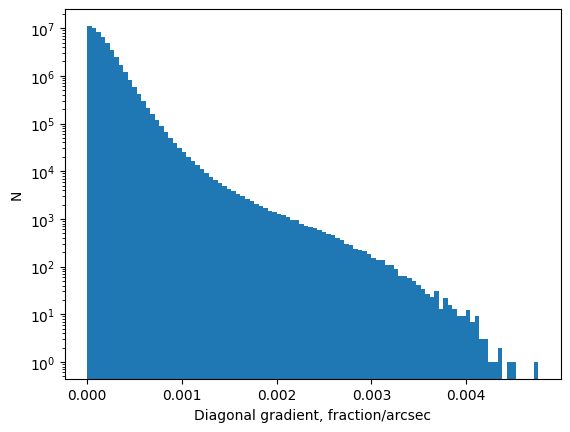

In [8]:
import matplotlib.pyplot as plt

plt.hist(gradients, bins=100, log=True)
plt.xlabel('Diagonal gradient, fraction/arcsec')
plt.ylabel('N')